# Import libraries and data

In [1]:
# import libraries 
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

from Bio import SeqIO
from utils import keep_first_uniprot, protein_analysis, get_uniprot, get_value

In [2]:
data_path = os.getcwd() + "/Datasets/"

## Curated CSF data set

In [3]:
csf = pd.read_csv(data_path + "CSF/csf.csv")
csf

,Uniprot,#Peptides_Macron2018A,#Peptides_Macron2020,#Peptides_Zhang2015,#Peptides_Guldbrandsen2014,#Peptides_Macron2018B,#Peptides_Schutzer2010,#Peptides_Pan2007,#Studies
0,Q6K0P9,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Q9GZZ8,1.0,3.0,NaN,NaN,NaN,NaN,NaN,2
2,P09529,3.0,3.0,4.0,4.0,1.0,NaN,NaN,5
3,P61019,2.0,3.0,NaN,NaN,2.0,NaN,NaN,3
4,Q9GZX9,4.0,4.0,3.0,3.0,4.0,5.0,1.0,7
...,...,...,...,...,...,...,...,...,...
5719,Q9ULJ1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1
5720,Q9BTA9,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1
5721,Q86VF7,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1
5722,Q8NDV3,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1


## Human proteome Uniprot sequences

In [4]:
df = pd.read_csv(data_path + "Uniprot/Human_proteome_Uniprot_seq.tab", sep="\t", header=0, names=["Uniprot", "Sequence"])
# drop entries without sequence (obsolete)
df.dropna(subset=["Sequence"], inplace=True) # none dropped
# drop entries with non-standard amino acids
df = df[df["Sequence"].str.contains("B|U|X") == False] # 25 entries dropped

## Detected brain proteome Uniprot sequences

In [5]:
brain_detected = pd.read_csv(data_path + "Brain/Brain_detected.csv")
print("Number of brain detected proteins:", len(brain_detected))

Number of brain detected proteins: 16021


## Elevated brain proteome (HPA)

In [6]:
brain_elevated = pd.read_csv(data_path + "Brain/Brain_elevated.csv")
print("Number of brain elevated proteins:", len(brain_elevated))

Number of brain elevated proteins: 2546


# Feature generation

## Sequence length

In [7]:
df["Length"] = df["Sequence"].apply(len)

## Amino acid composition & attributes

In [8]:
# df = df.apply(protein_analysis, seq_col="Sequence", axis=1)

In [9]:
# save or load dataframe
# df.to_csv(data_path + "Features/df_features_PA_human_proteome.csv", index=False)
df = pd.read_csv(data_path + "Features/df_features_PA_human_proteome.csv") 
df

,Uniprot,Sequence,Length,Molecular weight,A,C,D,E,F,G,...,Polarity_large,Polarizability_low,Polarizability_medium,Polarizability_large,Charge_positive,Charge_neutral,Charge_negative,Buried,Exposed,Intermediate
0,Q9NWW9,MALARPRPRLGDLIEISRFGYAHWAIYVGDGYVVHLAPASEIAGAG...,162,17393.6480,0.129630,0.006173,0.043210,0.049383,0.012346,0.086420,...,0.302469,0.370370,0.413580,0.216049,0.117284,0.790123,0.092593,0.500000,0.234568,0.228395
1,Q99569,MPAPEQASLVEEGQPQTRQEAASTGPGMEPETTATTILASVKEQEL...,1192,131866.7406,0.064597,0.011745,0.046980,0.050336,0.015940,0.061242,...,0.342282,0.361577,0.420302,0.218121,0.113255,0.789430,0.097315,0.344799,0.315436,0.334732
2,Q02325,MEHKEVVLLLLLFLKSGQGEPLDDYVNTQGPSLFSVTKKQLGAGSR...,96,10970.5316,0.062500,0.041667,0.041667,0.114583,0.052083,0.052083,...,0.406250,0.260417,0.468750,0.270833,0.145833,0.697917,0.156250,0.416667,0.354167,0.197917
3,Q6UXB8,MHGSCSFLMLLLPLLLLLVATTGPVGALTDEEKRLMVELHNLYRAQ...,463,49470.5083,0.097192,0.025918,0.034557,0.084233,0.021598,0.071274,...,0.285097,0.362851,0.453564,0.183585,0.075594,0.805616,0.118790,0.416847,0.315335,0.332613
4,P62195,MALDGPEQMELEEGKAGSGLRQYYLSKIEELQLIVNDKSQNLRRLQ...,406,45625.5008,0.061576,0.007389,0.054187,0.093596,0.022167,0.071429,...,0.394089,0.268473,0.480296,0.251232,0.147783,0.704433,0.147783,0.423645,0.349754,0.201970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20356,Q96T66,MKSRIPVVLLACGSFNPITNMHLRMFEVARDHLHQTGMYQVIQGII...,252,28321.3452,0.071429,0.011905,0.043651,0.047619,0.019841,0.067460,...,0.349206,0.305556,0.416667,0.277778,0.119048,0.789683,0.091270,0.412698,0.297619,0.297619
20357,Q96NY8,MPLSLGAEMWGPEAWLLLLLLLASFTGRCPAGELETSDVVTVVLGQ...,510,55453.6413,0.064706,0.017647,0.043137,0.084314,0.021569,0.086275,...,0.317647,0.347059,0.466667,0.186275,0.084314,0.788235,0.127451,0.425490,0.290196,0.290196
20358,P07197,MSYTLDSLGNPSAYRRVTETRSSFSRVSGSPSSGFRSQSWSRGSPS...,916,102470.7832,0.075328,0.001092,0.038210,0.201965,0.012009,0.055677,...,0.481441,0.310044,0.463974,0.225983,0.164847,0.594978,0.240175,0.310044,0.462882,0.227074
20359,Q69YL0,MVLRRLLAALLHSPQLVERLSESRPIRRAAQLTAFALLQAQLRGQD...,99,10890.4720,0.141414,0.010101,0.030303,0.040404,0.030303,0.090909,...,0.353535,0.343434,0.424242,0.232323,0.181818,0.747475,0.070707,0.484848,0.232323,0.171717


## Structural features (NetSurfP-2.0)

In [10]:
#### TO DO ####
# do global feature generation from original results dataframe and save df

nsp_features = pd.read_csv(data_path + "Features/features_human_proteome_no_filtering.csv")
nsp_features = nsp_features[["id", "disorder", "helix", "turn", "sheet"]]
nsp_features.columns = ["Uniprot", "Disorder_NSP", "Helix_NSP", "Turn_NSP", "Sheet_NSP"]

In [11]:
# add structural features to feature dataframe
df = df.merge(nsp_features, on="Uniprot", how="inner")
df

,Uniprot,Sequence,Length,Molecular weight,A,C,D,E,F,G,...,Charge_positive,Charge_neutral,Charge_negative,Buried,Exposed,Intermediate,Disorder_NSP,Helix_NSP,Turn_NSP,Sheet_NSP
0,Q9NWW9,MALARPRPRLGDLIEISRFGYAHWAIYVGDGYVVHLAPASEIAGAG...,162,17393.6480,0.129630,0.006173,0.043210,0.049383,0.012346,0.086420,...,0.117284,0.790123,0.092593,0.500000,0.234568,0.228395,0.067901,0.382716,0.425926,0.191358
1,Q99569,MPAPEQASLVEEGQPQTRQEAASTGPGMEPETTATTILASVKEQEL...,1192,131866.7406,0.064597,0.011745,0.046980,0.050336,0.015940,0.061242,...,0.113255,0.789430,0.097315,0.344799,0.315436,0.334732,0.397651,0.328859,0.668624,0.002517
2,Q02325,MEHKEVVLLLLLFLKSGQGEPLDDYVNTQGPSLFSVTKKQLGAGSR...,96,10970.5316,0.062500,0.041667,0.041667,0.114583,0.052083,0.052083,...,0.145833,0.697917,0.156250,0.416667,0.354167,0.197917,0.302083,0.125000,0.604167,0.270833
3,Q6UXB8,MHGSCSFLMLLLPLLLLLVATTGPVGALTDEEKRLMVELHNLYRAQ...,463,49470.5083,0.097192,0.025918,0.034557,0.084233,0.021598,0.071274,...,0.075594,0.805616,0.118790,0.416847,0.315335,0.332613,0.373650,0.144708,0.762419,0.092873
4,P62195,MALDGPEQMELEEGKAGSGLRQYYLSKIEELQLIVNDKSQNLRRLQ...,406,45625.5008,0.061576,0.007389,0.054187,0.093596,0.022167,0.071429,...,0.147783,0.704433,0.147783,0.423645,0.349754,0.201970,0.096059,0.458128,0.399015,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20298,Q96T66,MKSRIPVVLLACGSFNPITNMHLRMFEVARDHLHQTGMYQVIQGII...,252,28321.3452,0.071429,0.011905,0.043651,0.047619,0.019841,0.067460,...,0.119048,0.789683,0.091270,0.412698,0.297619,0.297619,0.158730,0.380952,0.500000,0.119048
20299,Q96NY8,MPLSLGAEMWGPEAWLLLLLLLASFTGRCPAGELETSDVVTVVLGQ...,510,55453.6413,0.064706,0.017647,0.043137,0.084314,0.021569,0.086275,...,0.084314,0.788235,0.127451,0.425490,0.290196,0.290196,0.368627,0.017647,0.643137,0.339216
20300,P07197,MSYTLDSLGNPSAYRRVTETRSSFSRVSGSPSSGFRSQSWSRGSPS...,916,102470.7832,0.075328,0.001092,0.038210,0.201965,0.012009,0.055677,...,0.164847,0.594978,0.240175,0.310044,0.462882,0.227074,0.556769,0.342795,0.640830,0.016376
20301,Q69YL0,MVLRRLLAALLHSPQLVERLSESRPIRRAAQLTAFALLQAQLRGQD...,99,10890.4720,0.141414,0.010101,0.030303,0.040404,0.030303,0.090909,...,0.181818,0.747475,0.070707,0.484848,0.232323,0.171717,0.171717,0.707071,0.292929,0.000000


## Solubility

In [12]:
weights = {"A": 0.8356471476582918, "C": 0.5208088354857734, "U": 0.5208088354857734, "E": 0.9876987431418378,
           "D": 0.9079044671339564, "G": 0.7997168496420723, "F": 0.5849790194237692, "I": 0.6784124413866582,
           "H": 0.8947913996466419, "K": 0.9267104557513497, "L": 0.6554221515081433, "M": 0.6296623675420369, 
           "N": 0.8597433107431216, "Q": 0.789434648348208, "P": 0.8235328714705341, "S": 0.7440908318492778,
           "R": 0.7712466317693457, "T": 0.8096922697856334, "W": 0.6374678690957594, "V": 0.7357837119163659,
           "Y": 0.6112801822947587}

A = 81.0581
B = -62.7775

def sol(seq):
    SWI = np.mean(([weights[i] for i in seq]))
    sol = 1/(1 + np.exp(-(81.0581*SWI + -62.7775)))
    return sol

In [13]:
df["Solubility"] = df["Sequence"].apply(sol)

## Transmembrane prediction

In [14]:
# TMHMM results had to be split up as webserver only allows 10000 sequences at once
tmhmm_A = pd.read_csv(data_path + "Features/TMHMM_results_brain_detected_A.txt", header=None, sep="\t", 
    names=["Uniprot", "Length", "ExpAA", "First60ExpAA", "PredHel", "Topology"])
tmhmm_B = pd.read_csv(data_path + "Features/TMHMM_results_brain_detected_B.txt", header=None, sep="\t", 
    names=["Uniprot", "Length", "ExpAA", "First60ExpAA", "PredHel", "Topology"])

In [15]:
tmhmm_A["Uniprot"] = tmhmm_A["Uniprot"].apply(get_uniprot)
tmhmm_A["Length"] = tmhmm_A["Length"].apply(get_value)
tmhmm_A["ExpAA"] = tmhmm_A["ExpAA"].apply(get_value)
tmhmm_A["First60ExpAA"] = tmhmm_A["First60ExpAA"].apply(get_value)
tmhmm_A["PredHel"] = tmhmm_A["PredHel"].apply(get_value)

tmhmm_B["Uniprot"] = tmhmm_B["Uniprot"].apply(get_uniprot)
tmhmm_B["Length"] = tmhmm_B["Length"].apply(get_value)
tmhmm_B["ExpAA"] = tmhmm_B["ExpAA"].apply(get_value)
tmhmm_B["First60ExpAA"] = tmhmm_B["First60ExpAA"].apply(get_value)
tmhmm_B["PredHel"] = tmhmm_B["PredHel"].apply(get_value)

In [16]:
# combine results into one dataframe
tmhmm = pd.concat([tmhmm_A, tmhmm_B], axis=0)

In [17]:
#### TO DO ####
# check why inner merge leads to missing entries
# why do we not have TMHMM predictions for all brain proteins?

df = df.merge(tmhmm[["Uniprot", "ExpAA", "First60ExpAA", "PredHel"]], on="Uniprot", how="left")
df.fillna(0, inplace=True)
df["PredHel_binary"] = np.where(df["PredHel"] == 0, 0, 1)
df

,Uniprot,Sequence,Length,Molecular weight,A,C,D,E,F,G,...,Intermediate,Disorder_NSP,Helix_NSP,Turn_NSP,Sheet_NSP,Solubility,ExpAA,First60ExpAA,PredHel,PredHel_binary
0,Q9NWW9,MALARPRPRLGDLIEISRFGYAHWAIYVGDGYVVHLAPASEIAGAG...,162,17393.6480,0.129630,0.006173,0.043210,0.049383,0.012346,0.086420,...,0.228395,0.067901,0.382716,0.425926,0.191358,0.641053,26.95,4.17,1.0,1
1,Q99569,MPAPEQASLVEEGQPQTRQEAASTGPGMEPETTATTILASVKEQEL...,1192,131866.7406,0.064597,0.011745,0.046980,0.050336,0.015940,0.061242,...,0.334732,0.397651,0.328859,0.668624,0.002517,0.619151,0.00,0.00,0.0,0
2,Q02325,MEHKEVVLLLLLFLKSGQGEPLDDYVNTQGPSLFSVTKKQLGAGSR...,96,10970.5316,0.062500,0.041667,0.041667,0.114583,0.052083,0.052083,...,0.197917,0.302083,0.125000,0.604167,0.270833,0.641370,0.00,0.00,0.0,0
3,Q6UXB8,MHGSCSFLMLLLPLLLLLVATTGPVGALTDEEKRLMVELHNLYRAQ...,463,49470.5083,0.097192,0.025918,0.034557,0.084233,0.021598,0.071274,...,0.332613,0.373650,0.144708,0.762419,0.092873,0.731990,26.29,22.27,1.0,1
4,P62195,MALDGPEQMELEEGKAGSGLRQYYLSKIEELQLIVNDKSQNLRRLQ...,406,45625.5008,0.061576,0.007389,0.054187,0.093596,0.022167,0.071429,...,0.201970,0.096059,0.458128,0.399015,0.142857,0.769943,0.00,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20298,Q96T66,MKSRIPVVLLACGSFNPITNMHLRMFEVARDHLHQTGMYQVIQGII...,252,28321.3452,0.071429,0.011905,0.043651,0.047619,0.019841,0.067460,...,0.297619,0.158730,0.380952,0.500000,0.119048,0.653012,0.72,0.72,0.0,0
20299,Q96NY8,MPLSLGAEMWGPEAWLLLLLLLASFTGRCPAGELETSDVVTVVLGQ...,510,55453.6413,0.064706,0.017647,0.043137,0.084314,0.021569,0.086275,...,0.290196,0.368627,0.017647,0.643137,0.339216,0.651683,0.00,0.00,0.0,0
20300,P07197,MSYTLDSLGNPSAYRRVTETRSSFSRVSGSPSSGFRSQSWSRGSPS...,916,102470.7832,0.075328,0.001092,0.038210,0.201965,0.012009,0.055677,...,0.227074,0.556769,0.342795,0.640830,0.016376,0.990665,0.00,0.00,0.0,0
20301,Q69YL0,MVLRRLLAALLHSPQLVERLSESRPIRRAAQLTAFALLQAQLRGQD...,99,10890.4720,0.141414,0.010101,0.030303,0.040404,0.030303,0.090909,...,0.171717,0.171717,0.707071,0.292929,0.000000,0.429929,0.00,0.00,0.0,0


## Subcellular location prediction

In [18]:
deeploc = pd.read_csv(data_path + "Features/DeepLoc_results_human_proteome.txt", sep="\t")
deeploc.rename(columns={"ID":"Uniprot"}, inplace=True)

# retrieve Uniprot ID
deeploc["Uniprot"] = deeploc["Uniprot"].apply(get_uniprot)
deeploc

,Uniprot,Location,Membrane,Nucleus,Cytoplasm,Extracellular,Mitochondrion,Cell_membrane,Endoplasmic_reticulum,Plastid,Golgi_apparatus,Lysosome/Vacuole,Peroxisome
0,Q8WZ42,Cytoplasm,0.0054,0.0528,0.9364,0.0001,0.0000,0.0090,0.0001,0.0001,0.0002,0.0008,0.0006
1,Q8WXI7,Cytoplasm,0.2836,0.1055,0.6656,0.0005,0.0002,0.2102,0.0101,0.0001,0.0041,0.0026,0.0012
2,Q8NF91,Cytoplasm,0.1989,0.0707,0.5495,0.0002,0.0008,0.0319,0.0229,0.0001,0.2861,0.0377,0.0001
3,Q7Z5P9,Extracellular,0.0550,0.0407,0.1452,0.7810,0.0033,0.0277,0.0007,0.0000,0.0002,0.0011,0.0000
4,Q5VST9,Cytoplasm,0.0108,0.0871,0.8976,0.0002,0.0000,0.0140,0.0001,0.0000,0.0002,0.0003,0.0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20371,P02729,Extracellular,0.0006,0.0031,0.0268,0.9364,0.0315,0.0000,0.0000,0.0022,0.0000,0.0001,0.0000
20372,P0DOY5,Extracellular,0.1216,0.0002,0.0047,0.7318,0.1119,0.0346,0.0005,0.0144,0.0011,0.1006,0.0002
20373,P01858,Extracellular,0.0399,0.2627,0.0592,0.6342,0.0264,0.0119,0.0008,0.0000,0.0047,0.0000,0.0000
20374,P0DPI4,Extracellular,0.3387,0.0396,0.0151,0.4207,0.1285,0.2067,0.0033,0.0027,0.0677,0.1158,0.0000


In [19]:
deeploc["Location"].value_counts(dropna=False)

Cytoplasm                5602
Nucleus                  5430
Cell_membrane            3538
Extracellular            2034
Mitochondrion            1563
Endoplasmic_reticulum    1342
Golgi_apparatus           454
Peroxisome                160
Lysosome/Vacuole          136
Plastid                   117
Name: Location, dtype: int64

In [20]:
# add subcellular locations as binary features
for i in deeploc["Location"].unique():
    deeploc_subset = deeploc[deeploc["Location"] == i]
    df[i] = np.where(df["Uniprot"].isin(deeploc_subset["Uniprot"]), 1, 0)

##  Domains

In [21]:
def read_uniprot_list(file):
    file = open(data_path + "Features/" + file, "r")
    lines = file.readlines()
    uniprots = []
    
    for line in lines:
        line_strip = line.strip()
        uniprots.append(line_strip)
        
    return uniprots  

### Cadherin-1 (PS00232)

In [22]:
PS00232 = read_uniprot_list("PS00232.txt")
df["PS00232"] = np.where(df["Uniprot"].isin(PS00232), 1, 0)
df["PS00232"].value_counts()

0    20253
1       50
Name: PS00232, dtype: int64

### G-protein receptor F1 (PS00237)

In [23]:
PS00237 = read_uniprot_list("PS00237.txt")
df["PS00237"] = np.where(df["Uniprot"].isin(PS00237), 1, 0)
df["PS00237"].value_counts()

0    20215
1       88
Name: PS00237, dtype: int64

### Homeobox (PS00027)

In [24]:
PS00027 = read_uniprot_list("PS00027.txt")
df["PS00027"] = np.where(df["Uniprot"].isin(PS00027), 1, 0)
df["PS00027"].value_counts()

0    20237
1       66
Name: PS00027, dtype: int64

### Zinc Finger C2H2 (PS00028)

In [25]:
PS00028 = read_uniprot_list("PS00028.txt")
df["PS00028"] = np.where(df["Uniprot"].isin(PS00028), 1, 0)
df["PS00028"].value_counts()

0    20245
1       58
Name: PS00028, dtype: int64

### EGF1 (PS00022)

In [26]:
PS00022 = read_uniprot_list("PS00022.txt")
df["PS00022"] = np.where(df["Uniprot"].isin(PS00022), 1, 0)
df["PS00022"].value_counts()

0    20258
1       45
Name: PS00022, dtype: int64

### EGF2 (PS01186)

In [27]:
PS01186 = read_uniprot_list("PS01186.txt")
df["PS01186"] = np.where(df["Uniprot"].isin(PS01186), 1, 0)
df["PS01186"].value_counts()

0    20261
1       42
Name: PS01186, dtype: int64

## Glycosylation prediction

### NetOglyc

In [28]:
#### TO DO ####
# oglyc = pd.read_csv(data_path + "Features/prediction_results.txt")

### NetNglyc

In [29]:
def netNglyc_filter(file, file_name):
    """
    """
    # open results file of netNglyc predictions
    results = open(file, "r")
    lines = results.readlines()
    
    # open new file to save filtered lines to
    filtered_results = open(data_path + "Features/" + file_name + ".txt", "w+")
    
    for line in lines:
        # save relevant lines to new file
        if line[:3] == "sp|":
            filtered_results.writelines(line)
    
    # close file
    filtered_results.close()
    
    return None
    
def split_netNglyc(df):
    """
    """
    string = df[0]
    
    # retrieve information from first column
    name, pos, seq = string.split()

    # retrieve Uniprot ID from description
    uniprot = get_uniprot(name)
    
    df["Uniprot"] = uniprot
    df["Position"] = pos
    df["Sequence"] = seq
    
    # drop old column
    df.drop(columns=[0], axis=1, inplace=True)
    
    # reorder columns
    df = df[["Uniprot", "Position", "Sequence", "Potential", "Jury agreement", "Result"]]
    
    return df

In [30]:
# # filter netNglyc results file
# netNglyc_filter(data_path + "Features/NetNglyc_results_human_proteome.out", "NetNglyc_results_human_proteome_filtered")

In [31]:
# # # create clean dataframe of glycosylation prediction results
# netnglyc = pd.read_csv(data_path + "Features/NetNglyc_results_human_proteome_filtered.txt", sep="\t", header=None) 
# netnglyc.dropna(axis=1, how="all", inplace=True)
# netnglyc.columns = [0, "Potential", "Jury agreement", "Result"]
# netnglyc = netnglyc.apply(split_netNglyc, axis=1)
# netnglyc

In [32]:
# save or load dataframe
# netnglyc.to_csv(data_path + "Features/NetNglyc.csv", index=False)
netnglyc = pd.read_csv(data_path + "Features/NetNglyc.csv") 

In [33]:
# filter for predicted glycosylation sites, "-" means predicted negative site
netnglyc_pos = netnglyc[netnglyc["Result"].str.contains("+++", regex=False)]
netnglyc_pos

,Uniprot,Position,Sequence,Potential,Jury agreement,Result
35,Q9ULX7,213,NGSL,0.8029,(9/9),+++
42,Q01518,358,NTTL,0.7677,(9/9),+++
72,Q16787,142,NLTL,0.7580,(9/9),+++
92,P55268,248,NLTR,0.7910,(9/9),+++
102,Q9BYZ2,39,NGTW,0.7504,(9/9),+++
...,...,...,...,...,...,...
23163,P10912,156,NWTL,0.7660,(9/9),+++
23173,Q9NZ52,18,NPSN,0.7531,(9/9),+++
23176,Q9P109,286,NISK,0.7547,(9/9),+++
23199,Q9UGJ1,292,NLTR,0.7553,(9/9),+++


In [34]:
glyc_sites = pd.DataFrame(netnglyc_pos["Uniprot"].value_counts(), index=None).reset_index()
glyc_sites.columns = ["Uniprot", "Glycosylation"]
glyc_sites

,Uniprot,Glycosylation
0,P15144,5
1,A8MTY0,4
2,Q8N0Z9,4
3,Q86XK7,4
4,P24821,4
...,...,...
1131,P36897,1
1132,O95049,1
1133,P51786,1
1134,Q9UPU5,1


In [35]:
# # add glycosylation as a binary feature
# df["Glycosylation"] = np.where(df["Uniprot"].isin(glyc_sites["Uniprot"]), 1, 0)

# add number of glycosylation sites as a feature
df = df.merge(glyc_sites, on="Uniprot", how="left")
df.fillna(0, inplace=True)
df

,Uniprot,Sequence,Length,Molecular weight,A,C,D,E,F,G,...,Golgi_apparatus,Peroxisome,Plastid,PS00232,PS00237,PS00027,PS00028,PS00022,PS01186,Glycosylation
0,Q9NWW9,MALARPRPRLGDLIEISRFGYAHWAIYVGDGYVVHLAPASEIAGAG...,162,17393.6480,0.129630,0.006173,0.043210,0.049383,0.012346,0.086420,...,0,0,0,0,0,0,0,0,0,0.0
1,Q99569,MPAPEQASLVEEGQPQTRQEAASTGPGMEPETTATTILASVKEQEL...,1192,131866.7406,0.064597,0.011745,0.046980,0.050336,0.015940,0.061242,...,0,0,0,0,0,0,0,0,0,0.0
2,Q02325,MEHKEVVLLLLLFLKSGQGEPLDDYVNTQGPSLFSVTKKQLGAGSR...,96,10970.5316,0.062500,0.041667,0.041667,0.114583,0.052083,0.052083,...,0,0,0,0,0,0,0,0,0,0.0
3,Q6UXB8,MHGSCSFLMLLLPLLLLLVATTGPVGALTDEEKRLMVELHNLYRAQ...,463,49470.5083,0.097192,0.025918,0.034557,0.084233,0.021598,0.071274,...,0,0,0,0,0,0,0,0,0,0.0
4,P62195,MALDGPEQMELEEGKAGSGLRQYYLSKIEELQLIVNDKSQNLRRLQ...,406,45625.5008,0.061576,0.007389,0.054187,0.093596,0.022167,0.071429,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20298,Q96T66,MKSRIPVVLLACGSFNPITNMHLRMFEVARDHLHQTGMYQVIQGII...,252,28321.3452,0.071429,0.011905,0.043651,0.047619,0.019841,0.067460,...,0,0,0,0,0,0,0,0,0,0.0
20299,Q96NY8,MPLSLGAEMWGPEAWLLLLLLLASFTGRCPAGELETSDVVTVVLGQ...,510,55453.6413,0.064706,0.017647,0.043137,0.084314,0.021569,0.086275,...,0,0,0,0,0,0,0,0,0,0.0
20300,P07197,MSYTLDSLGNPSAYRRVTETRSSFSRVSGSPSSGFRSQSWSRGSPS...,916,102470.7832,0.075328,0.001092,0.038210,0.201965,0.012009,0.055677,...,0,0,0,0,0,0,0,0,0,0.0
20301,Q69YL0,MVLRRLLAALLHSPQLVERLSESRPIRRAAQLTAFALLQAQLRGQD...,99,10890.4720,0.141414,0.010101,0.030303,0.040404,0.030303,0.090909,...,0,0,0,0,0,0,0,0,0,0.0


### GlycoMine

In [36]:
# datasets and thresholds taken from https://glycomine.erc.monash.edu/Lab/GlycoMine/
glycomine_n = pd.read_csv(data_path + "Features/GlycoMine_N_results.txt", sep=" ") 
glycomine_n_pos = glycomine_n[glycomine_n["Value"] > 0.5]

glycomine_o = pd.read_csv(data_path + "Features/GlycoMine_O_results.zip", sep=" ") # text file too big for GitHub
glycomine_o_pos = glycomine_o[glycomine_o["Value"] > 0.502]

glycomine_c = pd.read_csv(data_path + "Features/GlycoMine_C_results.txt", sep=" ") 
glycomine_c_pos = glycomine_c[glycomine_c["Value"] > 0.555]

In [37]:
df["GlycoMine_N"] = np.where(df["Uniprot"].isin(set(glycomine_n_pos["UniProtID"])), 1, 0)
df["GlycoMine_O"] = np.where(df["Uniprot"].isin(set(glycomine_o_pos["UniProtID"])), 1, 0)
df["GlycoMine_C"] = np.where(df["Uniprot"].isin(set(glycomine_c_pos["UniProtID"])), 1, 0)

## GPI-Anchor prediction (NetGPI)

In [38]:
# NetGPI results had to be split up as webserver only allows 5000 sequences at once
netgpi_A = pd.read_csv(data_path + "Features/NetGPI_results_brain_detected_A.txt", sep="\t", header=1,
    names=["Uniprot", "Length", "Result", "Omega-site", "Likelihood", "Amino acid"]) 
netgpi_B = pd.read_csv(data_path + "Features/NetGPI_results_brain_detected_B.txt", sep="\t", header=1,
    names=["Uniprot", "Length", "Result", "Omega-site", "Likelihood", "Amino acid"]) 
netgpi_C = pd.read_csv(data_path + "Features/NetGPI_results_brain_detected_C.txt", sep="\t", header=1,
    names=["Uniprot", "Length", "Result", "Omega-site", "Likelihood", "Amino acid"]) 
netgpi_D = pd.read_csv(data_path + "Features/NetGPI_results_brain_detected_D.txt", sep="\t", header=1,
    names=["Uniprot", "Length", "Result", "Omega-site", "Likelihood", "Amino acid"]) 

In [39]:
# combine results into one dataframe
netgpi = pd.concat([netgpi_A, netgpi_B, netgpi_C, netgpi_D], axis=0)
netgpi["Uniprot"] = netgpi["Uniprot"].apply(get_uniprot)

In [40]:
# keep only proteins predicted to have GPI anchor
netgpi_pos = netgpi[netgpi["Result"] == "GPI-Anchored"]
netgpi_pos

,Uniprot,Length,Result,Omega-site,Likelihood,Amino acid
2,P40199,344,GPI-Anchored,320,0.462,G
45,O95170,752,GPI-Anchored,731,0.591,G
135,P55290,713,GPI-Anchored,690,0.572,N
225,P02708,457,GPI-Anchored,414,0.403,N
299,Q14CN2,919,GPI-Anchored,892,0.664,N
...,...,...,...,...,...,...
4473,P61165,79,GPI-Anchored,14,0.253,N
4488,Q9NRX6,74,GPI-Anchored,48,0.428,A
4503,Q9Y6X1,66,GPI-Anchored,30,0.303,N
4518,A0A1B0GW54,56,GPI-Anchored,29,0.358,G


In [41]:
df["GPI-anchor"] = np.where(df["Uniprot"].isin(netgpi_pos["Uniprot"]), 1, 0)

## Signal peptide

In [42]:
signalp = pd.read_csv(data_path + "Features/SignalP_results_human_proteome.txt", sep="\t", index_col=False, header=None, 
    skiprows=2, names=["Uniprot", "Prediction", "Likelihood-Other", "Likelihood-SP", "CS Position"])

# retrieve Uniprot ID
signalp["Uniprot"] = signalp["Uniprot"].apply(get_uniprot)
signalp_pos = signalp[signalp["Prediction"] == "SP"]
signalp_pos

,Uniprot,Prediction,Likelihood-Other,Likelihood-SP,CS Position
4,P22223,SP,0.000224,0.999762,CS pos: 24-25. Pr: 0.7575
5,Q9BXJ4,SP,0.000201,0.999764,CS pos: 22-23. Pr: 0.9800
6,P09871,SP,0.000226,0.999694,CS pos: 15-16. Pr: 0.9805
7,Q9ULX7,SP,0.000220,0.999737,CS pos: 18-19. Pr: 0.9241
26,Q16787,SP,0.002463,0.997510,CS pos: 36-37. Pr: 0.7144
...,...,...,...,...,...
20348,Q9HBH1,SP,0.190636,0.809347,CS pos: 23-24. Pr: 0.5940
20358,P98172,SP,0.000280,0.999700,CS pos: 27-28. Pr: 0.9724
20363,P34910,SP,0.260518,0.739443,CS pos: 21-22. Pr: 0.4787
20365,Q96PL5,SP,0.048187,0.951777,CS pos: 29-30. Pr: 0.8838


In [43]:
df["Signal peptide"] = np.where(df["Uniprot"].isin(signalp_pos["Uniprot"]), 1, 0)

## Nucleotide-binding proteins

In [44]:
# downloaded from http://biomine.cs.vcu.edu/servers/DRNApred/
with open(data_path + "Features/DRNApred_RNA_Uniprot_human_proteome.txt") as f:  
    RNA_bind = f.read().splitlines() 
with open(data_path + "Features/DRNApred_DNA_Uniprot_human_proteome.txt") as f:  
    DNA_bind = f.read().splitlines() 

In [45]:
df["RNA_binding"] = np.where(df["Uniprot"].isin(RNA_bind), 1, 0)
df["DNA_binding"] = np.where(df["Uniprot"].isin(DNA_bind), 1, 0)

## Protein-binding prediction

In [46]:
# def parse_SCRIBER_results(lines):
    
#     uniprots = []
#     preds = []
    
#     for i in range(0, len(lines), 4):    
        
#         # check if lines contains Uniprot header
#         assert lines[i][0] == ">", lines[i]
#         # add uniprot to list
#         uniprot = lines[i][1:].strip()
#         uniprots.append(uniprot)
        
#         # get protein binding predictions
#         prot_bind = lines[i+2].strip()
#         # check if lines contains Uniprot header
#         assert all(c in "01" for c in prot_bind), i
#         # calculate fraction of protein-binding to list
#         prot_bind_count = prot_bind.count("1")
#         prot_bind_fraction = prot_bind_count / len(prot_bind)
#         preds.append(prot_bind_fraction)
        
#     return uniprots, preds

In [47]:
# # downloaded from http://biomine.cs.vcu.edu/servers/SCRIBER/
# with open(data_path + "Features/SCRIBER_results_human_proteome.txt") as f:  
#     lines = f.readlines()

# uniprots, preds = parse_SCRIBER_results(lines)

In [48]:
# prot_bind_df = pd.DataFrame({"Uniprot":uniprots, "Prot_bind":preds})
# prot_bind_df.sort_values("Prot_bind")

In [49]:
# df = df.merge(prot_bind_df, on="Uniprot", how="left")
# df.fillna(0, inplace=True)
# df["Prot_bind_binary"] = np.where(df["Prot_bind"] == 0, 0, 1)

## Ectodomain

In [50]:
# add ectodomain annoation as a feature
shed = pd.read_csv(data_path + "/Features/Shedding_proteins_UniProt.txt", header=None, names=["Uniprot"])
df["Ectodomain_shedding"] = np.where(df["Uniprot"].isin(shed["Uniprot"]), 1, 0)

shed_DeepSMP = pd.read_csv(data_path + "/Features/Known_shedding_proteins_DeepSMP.txt", sep="\t")
df["Ectodomain_shedding"] = np.where(df["Uniprot"].isin(shed_DeepSMP["Uniprot ID"]), 1, df["Ectodomain_shedding"])

## CSF presence (Label)

In [51]:
df["CSF"] = np.where(df["Uniprot"].isin(csf["Uniprot"]), 1, -1)
df

,Uniprot,Sequence,Length,Molecular weight,A,C,D,E,F,G,...,Glycosylation,GlycoMine_N,GlycoMine_O,GlycoMine_C,GPI-anchor,Signal peptide,RNA_binding,DNA_binding,Ectodomain_shedding,CSF
0,Q9NWW9,MALARPRPRLGDLIEISRFGYAHWAIYVGDGYVVHLAPASEIAGAG...,162,17393.6480,0.129630,0.006173,0.043210,0.049383,0.012346,0.086420,...,0.0,0,0,0,0,0,0,0,0,-1
1,Q99569,MPAPEQASLVEEGQPQTRQEAASTGPGMEPETTATTILASVKEQEL...,1192,131866.7406,0.064597,0.011745,0.046980,0.050336,0.015940,0.061242,...,0.0,0,1,0,0,0,0,0,0,-1
2,Q02325,MEHKEVVLLLLLFLKSGQGEPLDDYVNTQGPSLFSVTKKQLGAGSR...,96,10970.5316,0.062500,0.041667,0.041667,0.114583,0.052083,0.052083,...,0.0,0,0,0,0,1,0,0,0,-1
3,Q6UXB8,MHGSCSFLMLLLPLLLLLVATTGPVGALTDEEKRLMVELHNLYRAQ...,463,49470.5083,0.097192,0.025918,0.034557,0.084233,0.021598,0.071274,...,0.0,1,1,0,1,1,0,0,0,1
4,P62195,MALDGPEQMELEEGKAGSGLRQYYLSKIEELQLIVNDKSQNLRRLQ...,406,45625.5008,0.061576,0.007389,0.054187,0.093596,0.022167,0.071429,...,0.0,0,1,0,0,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20298,Q96T66,MKSRIPVVLLACGSFNPITNMHLRMFEVARDHLHQTGMYQVIQGII...,252,28321.3452,0.071429,0.011905,0.043651,0.047619,0.019841,0.067460,...,0.0,0,0,0,0,0,0,0,0,-1
20299,Q96NY8,MPLSLGAEMWGPEAWLLLLLLLASFTGRCPAGELETSDVVTVVLGQ...,510,55453.6413,0.064706,0.017647,0.043137,0.084314,0.021569,0.086275,...,0.0,1,1,0,0,1,0,0,1,1
20300,P07197,MSYTLDSLGNPSAYRRVTETRSSFSRVSGSPSSGFRSQSWSRGSPS...,916,102470.7832,0.075328,0.001092,0.038210,0.201965,0.012009,0.055677,...,0.0,0,1,0,0,0,0,0,0,1
20301,Q69YL0,MVLRRLLAALLHSPQLVERLSESRPIRRAAQLTAFALLQAQLRGQD...,99,10890.4720,0.141414,0.010101,0.030303,0.040404,0.030303,0.090909,...,0.0,0,0,0,0,0,0,0,0,-1


# Check for significance and correlations

In [52]:
df.columns

Index(['Uniprot', 'Sequence', 'Length', 'Molecular weight', 'A', 'C', 'D', 'E',
       'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V',
       'W', 'Y', 'Isoelectric point', 'Instability index', 'Polar', 'Neutral',
       'Hydrophobic', 'Volume_small', 'Volume_medium', 'Volume_large',
       'Polarity_low', 'Polarity_medium', 'Polarity_large',
       'Polarizability_low', 'Polarizability_medium', 'Polarizability_large',
       'Charge_positive', 'Charge_neutral', 'Charge_negative', 'Buried',
       'Exposed', 'Intermediate', 'Disorder_NSP', 'Helix_NSP', 'Turn_NSP',
       'Sheet_NSP', 'Solubility', 'ExpAA', 'First60ExpAA', 'PredHel',
       'PredHel_binary', 'Cytoplasm', 'Extracellular', 'Lysosome/Vacuole',
       'Nucleus', 'Cell_membrane', 'Endoplasmic_reticulum', 'Mitochondrion',
       'Golgi_apparatus', 'Peroxisome', 'Plastid', 'PS00232', 'PS00237',
       'PS00027', 'PS00028', 'PS00022', 'PS01186', 'Glycosylation',
       'GlycoMine_N', 'GlycoMine_O', 'GlycoM

In [53]:
# calculate pairwise correlation
corr_all = df.corr()

<ipython-input-54-b27e84f1fd23>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_all, dtype=np.bool))


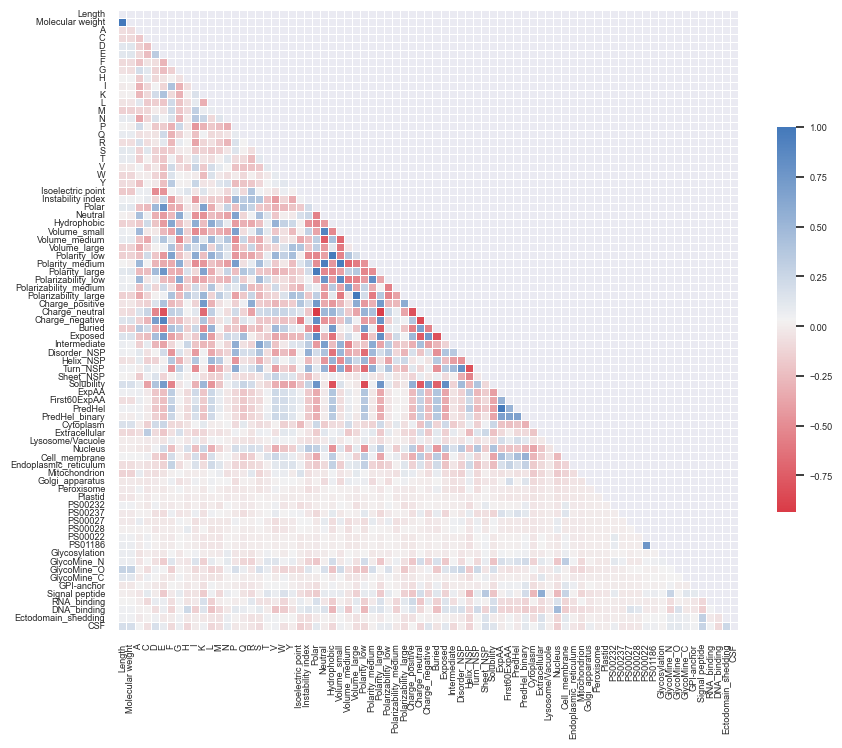

In [54]:
# figure settings
sns.set(font_scale=0.6)
fig, ax = plt.subplots(figsize=(10,10))

mask = np.triu(np.ones_like(corr_all, dtype=np.bool))
sns.set_style(style = 'white')
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr_all, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax,
            xticklabels=True, yticklabels=True)
plt.show()

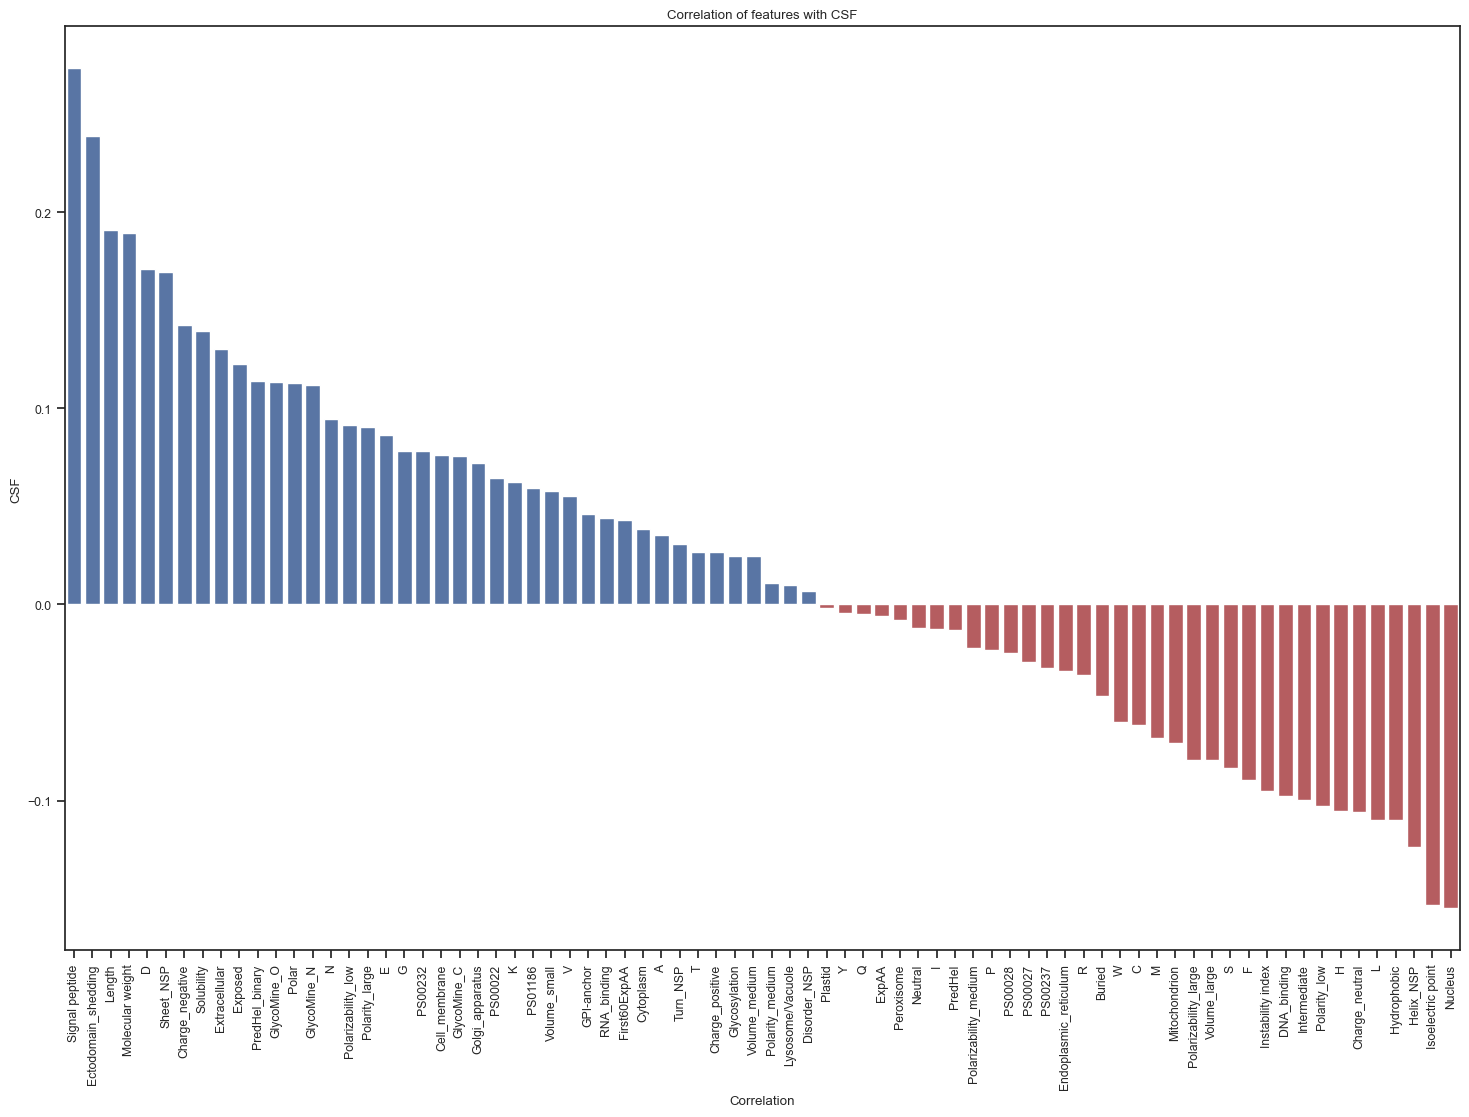

In [55]:
# figure settings
sns.set(style=("ticks"), font_scale=0.8)

correlations_all = corr_all[["CSF"]].sort_values(by="CSF", ascending=False)[1:]
correlations_all.reset_index(inplace=True)

colors_all = ["b" if (x > 0) else "r" for x in correlations_all["CSF"]]

fig = plt.figure(figsize=(18, 12)) 
sns.barplot(x="index", y="CSF", data=correlations_all, palette=colors_all)
plt.xlabel("Features") 
plt.xticks(rotation=90)
plt.xlabel("Correlation")
plt.title("Correlation of features with CSF")
plt.show()

# Save feature dataframes

In [56]:
# save entire feature data set
df.to_csv(data_path + "Features/df_features.csv", index=False)
print("Number of proteins:", len(df))

Number of proteins: 20303


## Brain detected

In [57]:
# filter for brain elevated proteins (data set to be used for model training)
df_brain_detected = df[df["Uniprot"].isin(brain_detected["Uniprot"])]
df_brain_detected.to_csv(data_path + "Features/df_features_brain_detected.csv", index=False)
print("Number of proteins:", len(df_brain_detected))

Number of proteins: 15990


## Brain elevated

In [58]:
# filter for brain elevated proteins (data set to be used for model training)
df_brain_elevated = df[df["Uniprot"].isin(brain_elevated["Uniprot"])]
df_brain_elevated.to_csv(data_path + "Features/df_features_brain_elevated.csv", index=False)
print("Number of proteins:", len(df_brain_elevated))

Number of proteins: 2542


## Brain detected without training & testing data

In [59]:
# filter for brain detected proteins not found in brain elevated set (to be used for biomarker discovery)
brain_detected_val = set(df_brain_detected["Uniprot"]) - set(df_brain_elevated["Uniprot"])
df_brain_detected_val = df[df["Uniprot"].isin(brain_detected_val)]
df_brain_detected_val.to_csv(data_path + "Features/df_features_brain_detected_val.csv", index=False)
print("Number of proteins:", len(df_brain_detected_val))

Number of proteins: 13448
